In [2]:
folder1 = 'data/image_classification/isClickbait/'
folder2 = 'data/image_classification/notClickbait/'

In [3]:
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        if filename.endswith('.jpg') or filename.endswith('.png'): 
            img = load_img(os.path.join(folder, filename), target_size=(255, 255)) 
            img_array = img_to_array(img)
            images.append(img_array)
            labels.append(label)
    return images, labels


In [4]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
images_folder1, labels_folder1 = load_images_from_folder(folder1, 1)
images_folder2, labels_folder2 = load_images_from_folder(folder2, 0)


In [5]:
import numpy as np

all_images = np.array(images_folder1 + images_folder2)
all_labels = np.array(labels_folder1 + labels_folder2)
print(all_images)
print(all_labels)

[[[[221.  75. 158.]
   [220.  92. 169.]
   [209. 146. 201.]
   ...
   [141. 157. 131.]
   [161. 227. 155.]
   [107. 187. 102.]]

  [[207.  57. 147.]
   [206.  72. 157.]
   [194. 125. 188.]
   ...
   [154. 171. 152.]
   [165. 227. 162.]
   [107. 184. 106.]]

  [[207.  57. 147.]
   [206.  72. 157.]
   [194. 125. 188.]
   ...
   [154. 171. 152.]
   [165. 227. 162.]
   [107. 184. 106.]]

  ...

  [[ 66. 177.  57.]
   [ 89. 198.  83.]
   [152. 243. 163.]
   ...
   [ 48. 134. 245.]
   [ 65.  99. 232.]
   [ 53.  75. 212.]]

  [[ 66. 177.  57.]
   [ 89. 198.  83.]
   [152. 243. 163.]
   ...
   [ 48. 134. 245.]
   [ 65.  99. 232.]
   [ 53.  75. 212.]]

  [[ 98. 215. 100.]
   [131. 243. 135.]
   [178. 255. 189.]
   ...
   [ 57. 142. 251.]
   [ 73. 107. 240.]
   [ 61.  83. 220.]]]


 [[[241. 241. 243.]
   [241. 241. 243.]
   [241. 241. 243.]
   ...
   [234. 232. 233.]
   [234. 232. 233.]
   [234. 232. 233.]]

  [[241. 241. 243.]
   [241. 241. 243.]
   [241. 241. 243.]
   ...
   [234. 232. 233.]
 

In [6]:
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(all_images, all_labels, test_size=0.3, random_state=42)

In [7]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(255,255,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5)) 
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.1)  # Případné úpravy hyperparametrů podle potřeby

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
4/4 [==============================] - ETA: 0s - loss: 0.7745 - accuracy: 0.4919WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001BDEF291B88> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) an

In [10]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Testovací loss: {test_loss}, Testovací accuracy: {test_accuracy}')

2/2 [==============================] - 0s 80ms/step - loss: 0.8196 - accuracy: 0.5667
Testovací loss: 0.819632887840271, Testovací accuracy: 0.5666666626930237


In [11]:
new_images = []
for filename in os.listdir("data/test_data/downloaded/"):
    if filename.endswith('.jpg') or filename.endswith('.png'): 
        img = load_img(os.path.join("data/test_data/downloaded/", filename), target_size=(255, 255)) 
        img_array = img_to_array(img)
        new_images.append(img_array)

new_images = np.array(new_images)
new_images = new_images.astype('float32') / 255.0
predictions = model.predict(new_images)
predictions

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
2/2 [==============================] - 0s 35ms/step


array([[0.85981387],
       [0.6339203 ],
       [0.4233324 ],
       [0.07789361],
       [0.15996478],
       [0.08635201],
       [0.9019063 ],
       [0.29629388],
       [0.34997463],
       [0.43349713],
       [0.32184872],
       [0.03476986],
       [0.01973543],
       [0.11274057],
       [0.18652673],
       [0.8438038 ],
       [0.21971793],
       [0.02054148],
       [0.08241966],
       [0.00656597],
       [0.00393744],
       [0.3413705 ],
       [0.4329289 ],
       [0.02197911],
       [0.41396102],
       [0.39430392],
       [0.01335992],
       [0.1616641 ],
       [0.27701238],
       [0.14407985],
       [0.09479304],
       [0.13614891],
       [0.08492355],
       [0.5678141 ],
       [0.0304414 ],
       [0.02770662],
       [0.28679252],
       [0.04819994],
       [0.3369182 ],
       [0.36688808],
       [0.08443601],
       [0.7801278 ],
       [0.72493154],
       [0.1882998 ]], dtype=float32)

In [12]:
import pandas as pd
hand_classified = pd.read_fwf("data/test_data/hand_classified.txt")
hand_classified = hand_classified["0"]
hand_classified

0     0
1     0
2     0
3     1
4     1
5     0
6     0
7     1
8     0
9     0
10    1
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    1
26    0
27    0
28    0
29    1
30    0
31    0
32    0
33    1
34    0
35    0
36    1
37    0
38    1
39    1
40    1
41    1
42    0
43    0
Name: 0, dtype: int64

In [13]:
correct = np.zeros(len(hand_classified))
num_correct = 0;
for index in range(len(hand_classified)):
    if hand_classified[index] == round(predictions[index][0]):
        correct[index] = 1
        num_correct = num_correct + 1
print(correct)
percentage_correct = num_correct/len(hand_classified)
print(percentage_correct)

[0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1.]
0.6590909090909091


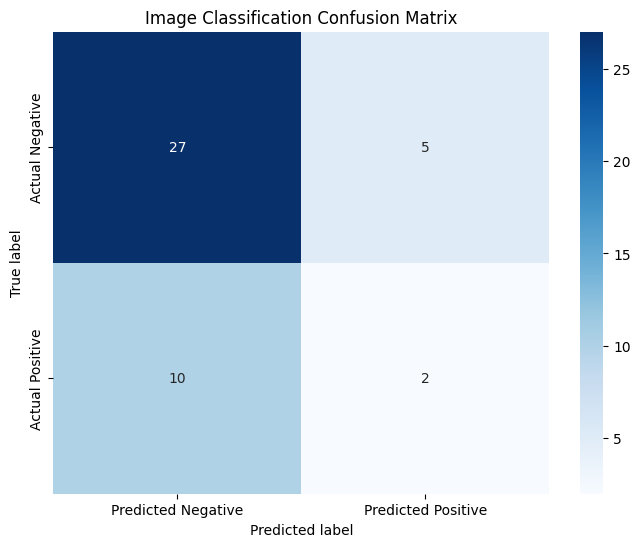

In [16]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

true_labels = hand_classified
predicted_labels = np.round(predictions[:, 0])

cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Image Classification Confusion Matrix')
plt.show()